In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("WineDataset.csv")

In [4]:
df.head()

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1290 non-null   object 
 1   Description                1286 non-null   object 
 2   Price                      1290 non-null   object 
 3   Capacity                   1290 non-null   object 
 4   Grape                      1275 non-null   object 
 5   Secondary Grape Varieties  488 non-null    object 
 6   Closure                    1279 non-null   object 
 7   Country                    1284 non-null   object 
 8   Unit                       1281 non-null   float64
 9   Characteristics            1253 non-null   object 
 10  Per bottle / case / each   1290 non-null   object 
 11  Type                       1285 non-null   object 
 12  ABV                        1281 non-null   object 
 13  Region                     1124 non-null   objec

In [10]:
df.columns

Index(['Title', 'Description', 'Price', 'Capacity', 'Grape',
       'Secondary Grape Varieties', 'Closure', 'Country', 'Unit',
       'Characteristics', 'Per bottle / case / each', 'Type', 'ABV', 'Region',
       'Style', 'Vintage', 'Appellation'],
      dtype='object')

In [11]:
df.shape

(1290, 17)

Dataset contains 1290 observations with mixed categorical and numerical features.

In [12]:
df['Unit'] = pd.to_numeric(df['Unit'], errors='coerce')


In [13]:
df.isna().sum().sort_values(ascending=False)


Secondary Grape Varieties    802
Appellation                  646
Region                       166
Style                         78
Characteristics               37
Grape                         15
Closure                       11
ABV                            9
Unit                           9
Vintage                        7
Country                        6
Type                           5
Description                    4
Per bottle / case / each       0
Capacity                       0
Price                          0
Title                          0
dtype: int64

In [14]:
df['Unit'].describe()


count    1281.000000
mean       10.177674
std         2.318850
min         0.000000
25%         9.400000
50%        10.100000
75%        10.500000
max        39.000000
Name: Unit, dtype: float64

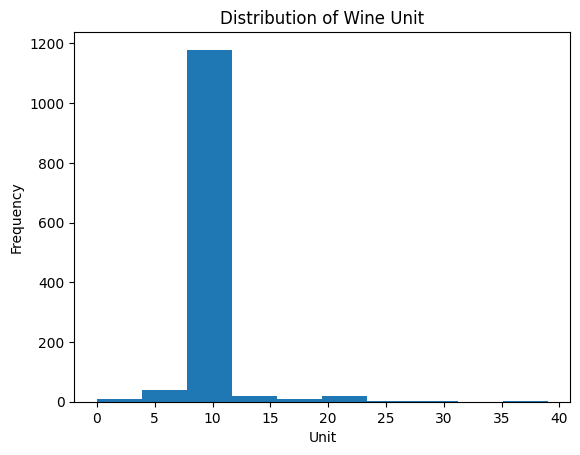

In [15]:
plt.figure()
plt.hist(df['Unit'].dropna())
plt.title("Distribution of Wine Unit")
plt.xlabel("Unit")
plt.ylabel("Frequency")
plt.show()


In [16]:
df['Country'].value_counts().head(10)


Country
France          502
Italy           147
Spain           113
Australia        96
New Zealand      91
South Africa     77
USA              51
Chile            46
Portugal         44
Argentina        40
Name: count, dtype: int64

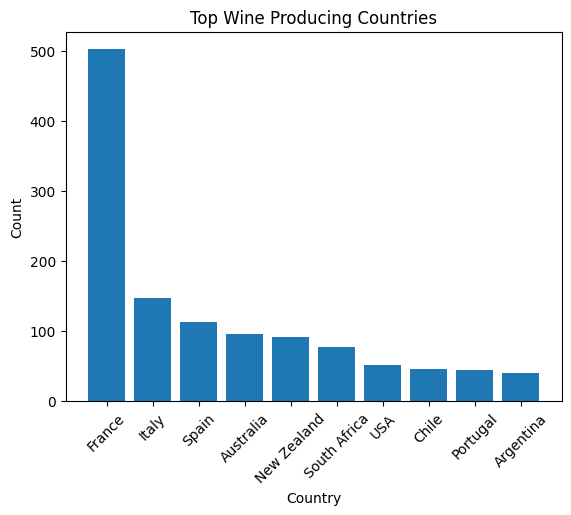

In [17]:
top_countries = df['Country'].value_counts().head(10)

plt.figure()
plt.bar(top_countries.index, top_countries.values)
plt.xticks(rotation=45)
plt.title("Top Wine Producing Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


<Figure size 640x480 with 0 Axes>

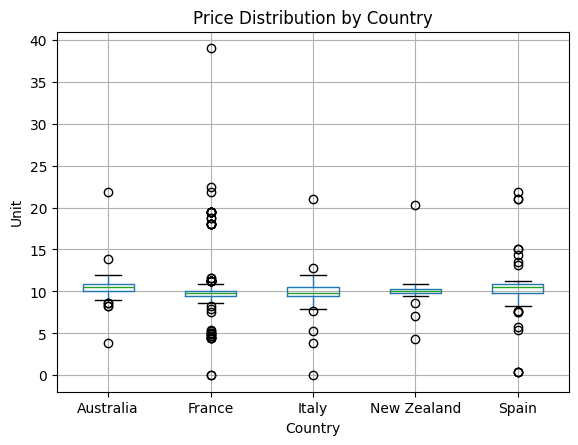

In [18]:
top5 = df['Country'].value_counts().head(5).index
df_top = df[df['Country'].isin(top5)]

plt.figure()
df_top.boxplot(column='Unit', by='Country')
plt.title("Price Distribution by Country")
plt.suptitle("")
plt.xlabel("Country")
plt.ylabel("Unit")
plt.show()


In [19]:
def price_segment(unit):
    if unit < 8:
        return "Budget"
    elif unit < 12:
        return "Mid-Range"
    elif unit < 20:
        return "Premium"
    else:
        return "Luxury"

df['PriceSegment'] = df['Unit'].apply(price_segment)


In [20]:
df['PriceSegment'].value_counts()


PriceSegment
Mid-Range    1176
Budget         52
Premium        38
Luxury         24
Name: count, dtype: int64

In [21]:
seg_country = (
    df[df['Country'].isin(top5)]
    .groupby(['Country', 'PriceSegment'])
    .size()
    .unstack()
)

seg_country


PriceSegment,Budget,Luxury,Mid-Range,Premium
Country,,,,
Australia,1.0,1.0,92.0,2.0
France,16.0,3.0,466.0,17.0
Italy,6.0,1.0,138.0,2.0
New Zealand,2.0,1.0,88.0,NaN
Spain,8.0,5.0,95.0,5.0


In [22]:
df_time = df.dropna(subset=['Vintage']).copy()
df_time['Vintage'] = pd.to_numeric(df_time['Vintage'], errors='coerce')
df_time = df_time.dropna(subset=['Vintage'])

avg_year = df_time.groupby('Vintage')['Unit'].mean()


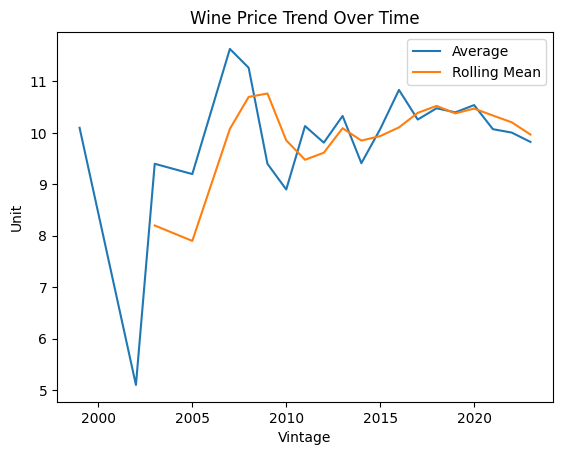

In [23]:
rolling_avg = avg_year.rolling(3).mean()

plt.figure()
plt.plot(avg_year.index, avg_year.values, label="Average")
plt.plot(rolling_avg.index, rolling_avg.values, label="Rolling Mean")
plt.legend()
plt.title("Wine Price Trend Over Time")
plt.xlabel("Vintage")
plt.ylabel("Unit")
plt.show()


The analysis reveals that wine pricing is strongly influenced by country of origin and grape variety, while vintage year alone is a weak predictor. Price segmentation highlights a dominant mid-range market with a small but significant premium segment.